# GameOf8

Documentation: https://en.wikipedia.org/wiki/15_puzzle

Online game: https://gamescrafters.berkeley.edu/site-legacy-archive-sp20/games.php?puzzle=8puzzle

Online tester: https://15puzzle.netlify.app/

The 8 puzzle (also called Gem Puzzle, Boss Puzzle, Game of Fifteen, Mystic Square and more) is a sliding puzzle. It has 9 square tiles numbered 1 to 8 in a frame that is 3 tile positions high and 3 tile positions wide, with one unoccupied position. Tiles in the same row or column of the open position can be moved by sliding them horizontally or vertically, respectively. The goal of the puzzle is to place the tiles in numerical order (from left to right, top to bottom).

<img src="https://camo.githubusercontent.com/d997a02627bad485c6cebc1d4f33eda25b4a65baae94a0a81c9dd6663b889118/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f3932342f312a5978655a4a7a666857346b6e354f35774147626b49672e676966" width="300" height="300">

Goal:

<img src="https://miro.medium.com/v2/resize:fit:281/1*IQ4oYMH3SCAriifZMdZA9w.png" width="300" height="300">

In [1]:
class Possition:

    def __init__(self,x,y):
        self.x = x
        self.y = y

    def __str__(self):
        return f"[x:{self.x},y:{self.y}]"

    def __repr__(self):
        return f"[x:{self.x},y:{self.y}]"

In [2]:
class Node:

    def __init__(self,stage,move):
        self.stage = stage
        self.move = move
        self.deep = None

    def __str__(self):
        return f"[move: {self.move}, stage: {self.stage}, deep: {self.deep}]"

    def __repr__(self):
        return f"[x:{self.x},y:{self.y}]"

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Game:

    GOAL = [[1, 2, 3], [4, 5, 6], [7, 8, None]]

    """
        INIT CONSTRUCTOR
        board: 3x3 int matrix
    """
    def __init__(self, initial_board):
        self.board = initial_board
        self.possition_empty_space = self.__find_empty_space_possition()

    """
        find the possition of the empty space as Possition object
    """
    def __find_empty_space_possition(self):
        for y in range(len(self.board)):
            for x in range(len(self.board[y])):
                if self.board[y][x] is None:
                    return Possition(x=x, y=y)
        raise Exception("There is not an empty space in the game")

    """
        return a copy of the actual game
    """
    def __copy(self):
        copy_board = [row[:] for row in self.board]
        return Game(copy_board)

    """
        show the actual board in a graphical view
    """
    def show(self):
        _, ax = plt.subplots()
        plt.imshow(np.array([[0 if x is None else x for x in fila] for fila in self.board]), cmap="YlGn", interpolation="nearest",vmin=0, vmax=255)
        ax.set_xticks(np.arange(-0.5, len(self.board), 1), minor=True)
        ax.set_yticks(np.arange(-0.5, len(self.board[0]), 1), minor=True)
        ax.grid(which="minor", color="black", linestyle="-", linewidth=2)
        ax.set_xticks([])
        ax.set_yticks([])
        for i in range(len(self.board)):
            for j in range(len(self.board[0])):
                value = self.board[i][j]
                text = str(value) if value is not None else " "
                ax.text(j, i, text, ha='center', va='center', color='black', fontsize=16, fontweight='bold')
        plt.show()

    """
        evaluate if the board have reached the target goal ?
        return BOOLEAN
    """
    def is_game_win(self):
        return self.board == self.GOAL

    """
        evaluate if the empty scuare can be move up ?
        return BOOLEAN
    """
    def is_allowed_move_up(self):
        return self.possition_empty_space.y > 0

    """
        evaluate if the empty scuare can be move down ?
        return BOOLEAN
    """
    def is_allowed_move_down(self):
        return self.possition_empty_space.y < len(self.board) - 1

    """
        evaluate if the empty scuare can be move left ?
        return BOOLEAN
    """
    def is_allowed_move_left(self):
        return self.possition_empty_space.x > 0

    """
        evaluate if the empty scuare can be move left ?
        return BOOLEAN
    """
    def is_allowed_move_right(self):
        return self.possition_empty_space.x < len(self.board[0]) - 1

    """
        modify the actual board by an up movement (empty scuare moves)
    """
    def move_up(self):
        self.board[self.possition_empty_space.y][self.possition_empty_space.x] = self.board[self.possition_empty_space.y-1][self.possition_empty_space.x]
        self.board[self.possition_empty_space.y-1][self.possition_empty_space.x] = None
        self.possition_empty_space.y -= 1

    """
        modify the actual board by an down movement (empty scuare moves)
    """
    def move_down(self):
        self.board[self.possition_empty_space.y][self.possition_empty_space.x] = self.board[self.possition_empty_space.y+1][self.possition_empty_space.x]
        self.board[self.possition_empty_space.y+1][self.possition_empty_space.x] = None
        self.possition_empty_space.y += 1

    """
        modify the actual board by an left movement (empty scuare moves)
    """
    def move_left(self):
        self.board[self.possition_empty_space.y][self.possition_empty_space.x] = self.board[self.possition_empty_space.y][self.possition_empty_space.x-1]
        self.board[self.possition_empty_space.y][self.possition_empty_space.x-1] = None
        self.possition_empty_space.x -= 1

    """
        modify the actual board by an right movement (empty scuare moves)
    """
    def move_right(self):
        self.board[self.possition_empty_space.y][self.possition_empty_space.x] = self.board[self.possition_empty_space.y][self.possition_empty_space.x+1]
        self.board[self.possition_empty_space.y][self.possition_empty_space.x+1] = None
        self.possition_empty_space.x += 1

    """
        obtain the next possible game boards
        !dont modify the actual board!
        return List of 3x3 matrix (boards) and movement
        in a NODE
    """
    def next_allowed_moves(self):
        next_nodes = []
        if self.is_allowed_move_up():
            copy_game = self.__copy()
            copy_game.move_up()
            next_node = Node(copy_game.board, "UP")
            next_nodes.append( next_node )
        if self.is_allowed_move_down():
            copy_game = self.__copy()
            copy_game.move_down()
            next_node = Node(copy_game.board, "DOWN")
            next_nodes.append( next_node )
        if self.is_allowed_move_left():
            copy_game = self.__copy()
            copy_game.move_left()
            next_node = Node(copy_game.board, "LEFT")
            next_nodes.append( next_node )
        if self.is_allowed_move_right():
            copy_game = self.__copy()
            copy_game.move_right()
            next_node = Node(copy_game.board, "RIGHT")
            next_nodes.append( next_node )
        return next_nodes

# TEST

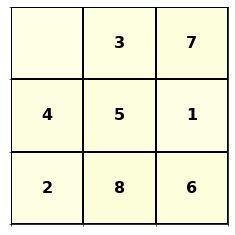

In [4]:
initial_board = [[None, 3, 7], [4, 5, 1], [2, 8, 6]]
game = Game( initial_board )
game.show()

In [5]:
game.is_game_win()

False

In [6]:
game.possition_empty_space

[x:0,y:0]

In [7]:
print( "can move-up? ", game.is_allowed_move_up() )
print( "can move-down? ", game.is_allowed_move_down() )
print( "can move-left? ", game.is_allowed_move_left() )
print( "can move-right? ", game.is_allowed_move_right() )

can move-up?  False
can move-down?  True
can move-left?  False
can move-right?  True


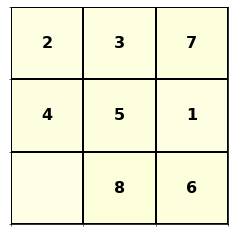

In [8]:
game.move_up()
game.show()

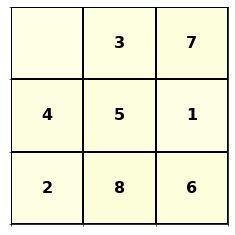

In [9]:
game.move_down()
game.show()

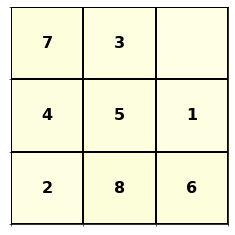

In [10]:
game.move_left()
game.show()

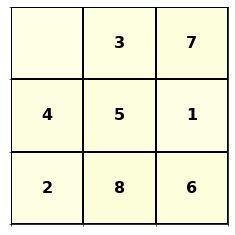

In [11]:
game.move_right()
game.show()

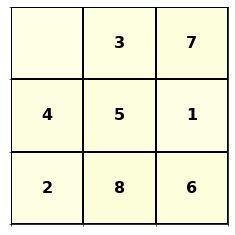

can move-up?  False
can move-down?  True
can move-left?  False
can move-right?  True


In [12]:
game.show()
print( "can move-up? ", game.is_allowed_move_up() )
print( "can move-down? ", game.is_allowed_move_down() )
print( "can move-left? ", game.is_allowed_move_left() )
print( "can move-right? ", game.is_allowed_move_right() )

In [13]:
moves = game.next_allowed_moves()
print("next_nodes: ",len(moves))

next_nodes:  2


In [14]:
for move in moves:
    print( "None: ", move )

None:  [move: DOWN, stage: [[4, 3, 7], [None, 5, 1], [2, 8, 6]], deep: None]
None:  [move: RIGHT, stage: [[3, None, 7], [4, 5, 1], [2, 8, 6]], deep: None]


IMPLEMENTACIÓN QUEUE:

In [21]:

from collections import deque

def solucion(initial_board):
    queue= deque([(initial_board, [])])
    
    visitados={tuple(map(tuple, initial_board))}

    while queue:
        board, movimientos = queue.popleft()
        game = Game(board)

    
        if game.is_game_win():
            return movimientos

        for next_move in game.next_allowed_moves():
            next_board = next_move.stage

            if tuple(map(tuple, next_board)) not in visitados:
                queue.append((next_board, movimientos + [next_move.move]))

                visitados.add(tuple(map(tuple, next_board)))

    return None


initial_board = [[5, 3, 7], [8, 2, 1], [6, 4, None]]
sol = solucion(initial_board)

if sol:
    for movimiento in sol:
        print(movimiento)




UP
UP
LEFT
DOWN
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
UP
RIGHT
UP
LEFT
DOWN
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT


IMPLEMENTANDO STACK:

In [22]:
class Pila:
    def __init__(self):
        self.items = []

    def esta_vacia(self):
        return len(self.items) == 0

    def apilar(self, item):
        self.items.append(item)

    def desapilar(self):
        if not self.esta_vacia():
            return self.items.pop()
        else:
            return None

    def cima(self):
        if not self.esta_vacia():
            return self.items[-1]
        else:
            return None


def solucion_pila(initial_board):
    pila = Pila()
    pila.apilar((initial_board, []))
    visitados = {tuple(map(tuple, initial_board))}

    while not pila.esta_vacia():
        board, movimientos = pila.desapilar()
        game = Game(board)

        if game.is_game_win():
            return movimientos

        for next_move in game.next_allowed_moves():
            next_board = next_move.stage

            if tuple(map(tuple, next_board)) not in visitados:
                pila.apilar((next_board, movimientos + [next_move.move]))
                visitados.add(tuple(map(tuple, next_board)))

    return None



initial_board = [[5, 3, 7], [8, 2, 1], [6, 4, None]]
sol = solucion_pila(initial_board)

if sol:
    for movimiento in sol:
        print(movimiento)

LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
DOWN
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT


RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP

RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LE

RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT


DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
U

LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
UP
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT


DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIG

LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT


LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
UP
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP


LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RI

RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
UP
RIGHT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP

LEFT
DOWN
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
DOWN
RIGHT
UP
UP
LEFT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT


LEFT
UP
UP
RIGHT
RIGHT
DOWN
DOWN
LEFT
LEFT
UP
UP
RIGHT
DOWN
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
DOWN
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEF

UP
LEFT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
DOWN
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
DOWN
RIGHT
UP
UP
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
DOWN
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
L

RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
DOWN
LEFT
UP
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
DOWN
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
DOWN
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEF

RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
DOWN
LEFT
UP
RIGHT
UP
LEFT
LEFT
DOWN
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
DOWN
RIGHT
UP
UP
LEFT
LEFT
DOWN
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
DOW

UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
DOWN
LEFT
UP
RIGHT
RIGHT
UP
LEFT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
DOWN
RIGHT
UP
UP
LEFT
DOWN
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
DOWN
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
UP
RIGHT
DOWN
RIGHT
DOWN
LEFT
LEFT
UP
UP
RIGHT
DOWN
RIGHT
UP
LEFT
LEFT
DOWN
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
DOWN
RIGHT
UP
UP
LEFT
LEFT
DOWN
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
UP
RIGHT
DOWN
LEFT
UP
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
UP
LEFT
LEFT
DOWN
RIGHT
RIGHT
DOWN
LEFT
UP
RIGH

IMPLEMENTANDO A*:

In [23]:

def distancia_taxista(board):
    goal = [[1, 2, 3], [4, 5, 6], [7, 8, None]]
    distancia = 0
    for y in range(3):
        for x in range(3):
            value = board[y][x]
            if value is not None:
                for gy in range(3):
                    for gx in range(3):
                        if goal[gy][gx] == value:
                            distancia += abs(y - gy) + abs(x - gx)
    return distancia

def solucion_a_star(initial_board):
    queue = deque([(initial_board, [], 0)])
    visitados = {tuple(map(tuple, initial_board))}

    while queue:
        board, moves, cost = queue.popleft()
        game = Game(board)

        if game.is_game_win():
            return moves

        for next_move in game.next_allowed_moves():
            next_board = next_move.stage
            new_moves = moves + [next_move.move]
            new_cost = cost + 1 + distancia_taxista(next_board)

            if tuple(map(tuple, next_board)) not in visitados:
                queue.append((next_board, new_moves, new_cost))
                visitados.add(tuple(map(tuple, next_board)))

    return None


tablero_inicial = [[5, 3, 7], [8, 2, 1], [6, 4, None]]
solucion = solucion_a_star(tablero_inicial)

if solucion:
    for movimiento in solucion:
        print(movimiento)

UP
UP
LEFT
DOWN
LEFT
DOWN
RIGHT
UP
RIGHT
DOWN
LEFT
UP
RIGHT
UP
LEFT
DOWN
LEFT
UP
RIGHT
RIGHT
DOWN
LEFT
LEFT
DOWN
RIGHT
RIGHT
